## Imports

In [2]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.UCB_training.UCB_train import clean_hourly
from neuralhydrology.UCB_training.UCB_train import combinedPlot
from neuralhydrology.evaluation.metrics import calculate_all_metrics

## Working directory

In [4]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("warm springs"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all
Train Basin File Exists: True


## Standard hourly LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [6]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so need to specify hourly
lstmNoPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=True)

In [7]:
lstmNoPhysicsHourly.train()

2025-01-29 09:10:39,209: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091039\output.log initialized.
2025-01-29 09:10:39,211: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091039
2025-01-29 09:10:39,215: ### Run configurations for testing_run
2025-01-29 09:10:39,217: experiment_name: testing_run
2025-01-29 09:10:39,219: train_basin_file: warm springs
2025-01-29 09:10:39,222: validation_basin_file: warm springs
2025-01-29 09:10:39,224: test_basin_file: warm springs
2025-01-29 09:10:39,226: train_start_date: 1994-10-01 00:00:00
2025-01-29 09:10:39,230: train_end_date: 2002-09-30 00:00:00
2025-01-29 09:10:39,232: validation_start_date: 2002-10-01 00:00:00
2025-01-29 09:10:39,234: validation_end_date: 2005-09-30 00:00:00
2025-01-29 09:10:39,237: test_start_date: 2005-10-01 00:00:00
2025-01-29 09:10:39,239: test_end_date: 2009-09-30 00:00:00
2025-01-29 09:10:39,240: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]
2025-01-29 09:14:32,765: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091039\validation\model_epoch008\validation_metrics.csv
2025-01-29 09:14:32,776: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091039\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_091039')

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH
Observed_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_obs
Simulated_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

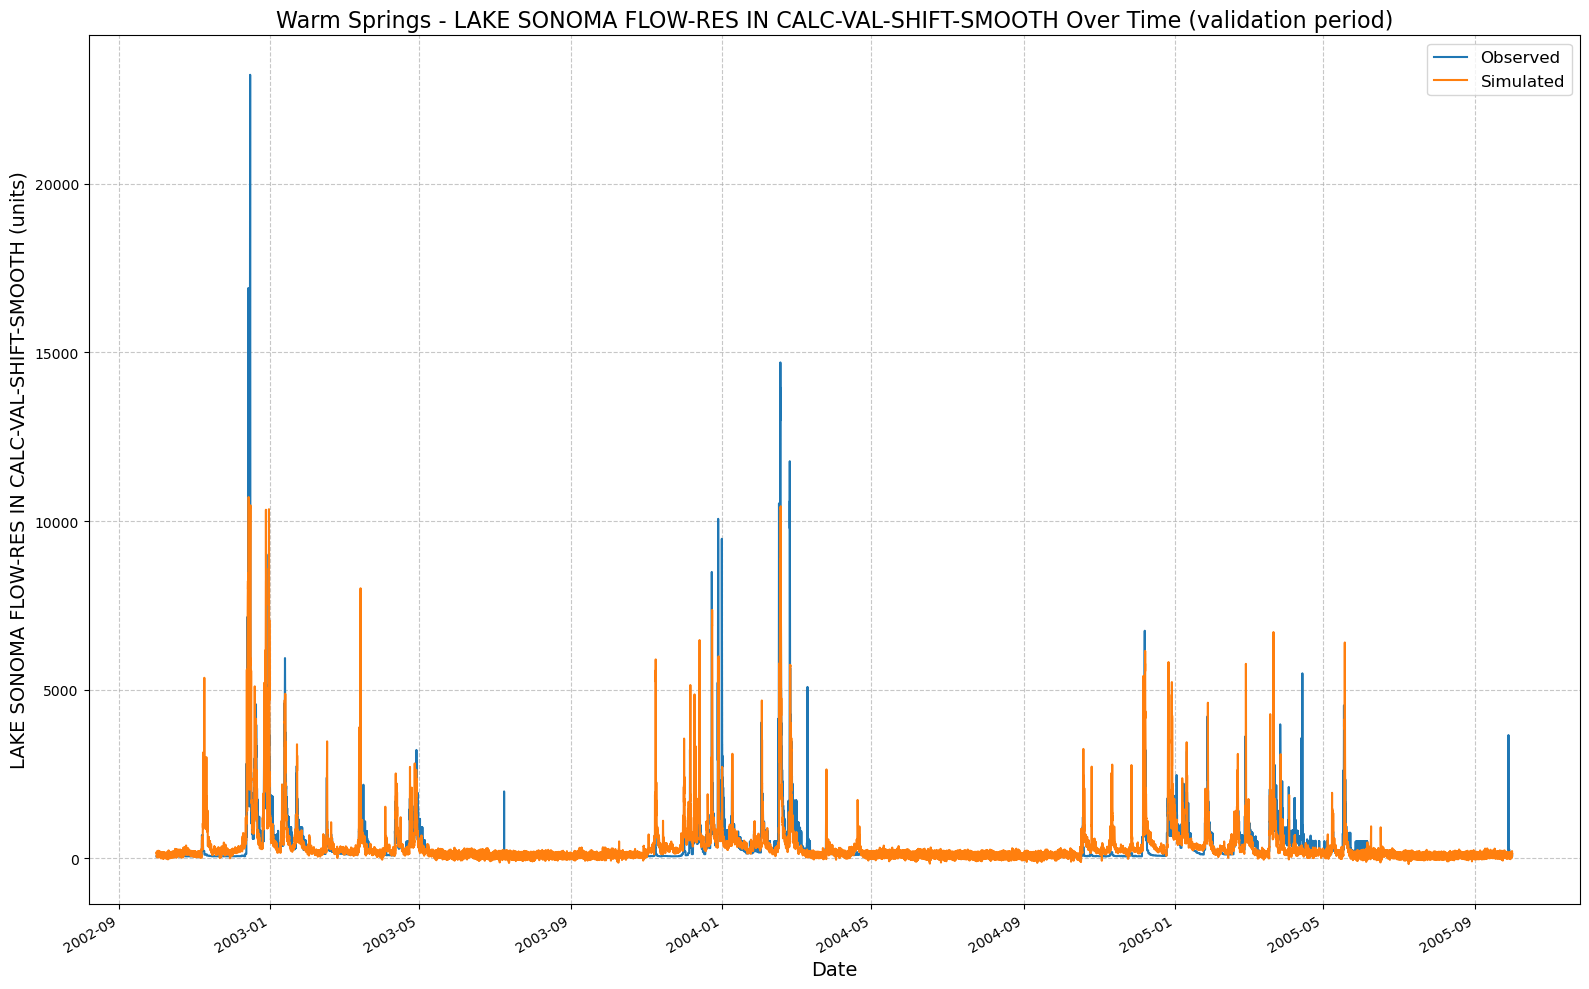

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091039\results_output_validation.csv


({'NSE': 0.5476852655410767,
  'MSE': 287033.0625,
  'RMSE': 535.7546663352546,
  'KGE': 0.7401835358637201,
  'Alpha-NSE': 0.9530936642615888,
  'Beta-KGE': 1.0997850894927979,
  'Beta-NSE': 0.04077758966251959,
  'Pearson-r': 0.7647398745669198,
  'FHV': 2.395695447921753,
  'FMS': -25.405465482311328,
  'FLV': -2124.8079665088926,
  'Peak-Timing': nan,
  'Peak-MAPE': 67.66217884264493},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_091039/results_output_validation.csv'))

In [8]:
lstmNoPhysicsHourly.results()

## Physics-informed LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [10]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/WarmSprings_Inflow_hourly.csv")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=True)

In [11]:
lstmPhysicsHourly.train()

2025-01-29 09:14:34,019: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091434\output.log initialized.
2025-01-29 09:14:34,021: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091434
2025-01-29 09:14:34,022: ### Run configurations for testing_run
2025-01-29 09:14:34,023: experiment_name: testing_run
2025-01-29 09:14:34,024: train_basin_file: warm springs
2025-01-29 09:14:34,025: validation_basin_file: warm springs
2025-01-29 09:14:34,026: test_basin_file: warm springs
2025-01-29 09:14:34,028: train_start_date: 1994-10-01 00:00:00
2025-01-29 09:14:34,030: train_end_date: 2002-09-30 00:00:00
2025-01-29 09:14:34,030: validation_start_date: 2002-10-01 00:00:00
2025-01-29 09:14:34,032: validation_end_date: 2005-09-30 00:00:00
2025-01-29 09:14:34,033: test_start_date: 2005-10-01 00:00:00
2025-01-29 09:14:34,035: test_end_date: 2009-09-30 00:00:00
2025-01-29 09:14:34,036: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:07<00:00,  7.35s/it]
2025-01-29 09:18:39,462: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091434\validation\model_epoch008\validation_metrics.csv
2025-01-29 09:18:39,471: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091434\validation\model_epoch008\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_091434')

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH
Observed_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_obs
Simulated_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

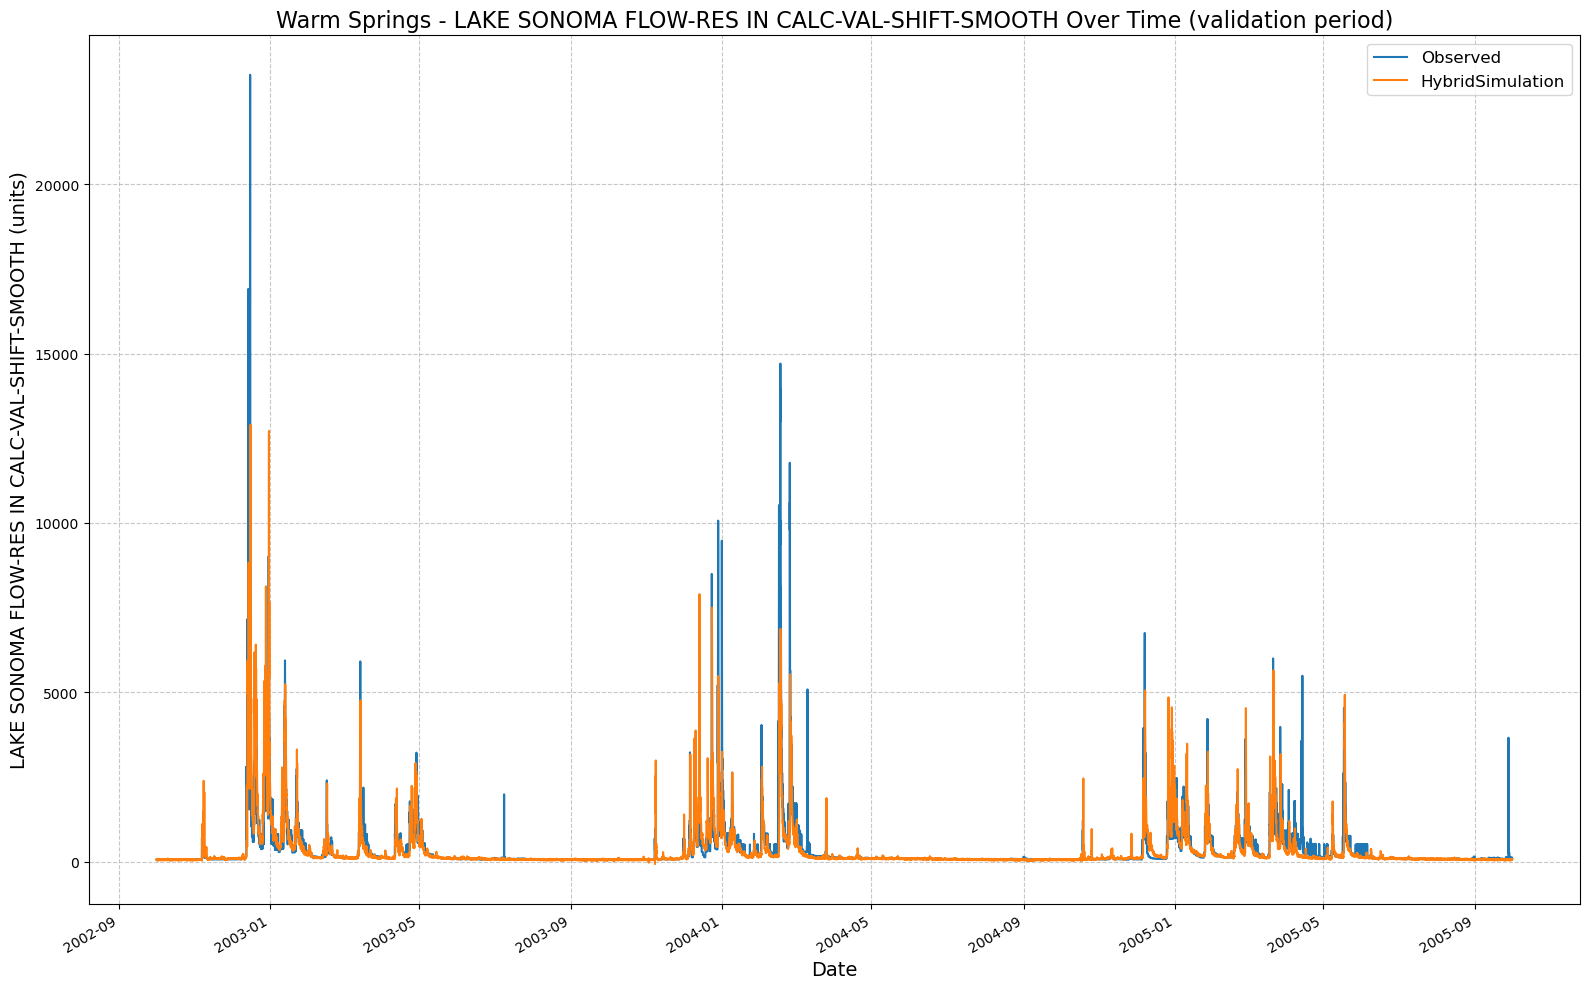

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091434\results_output_validation.csv


({'NSE': 0.6116780042648315,
  'MSE': 246424.109375,
  'RMSE': 496.41123010564536,
  'KGE': 0.7334323510828962,
  'Alpha-NSE': 0.8544159526914942,
  'Beta-KGE': 0.9377956986427307,
  'Beta-NSE': -0.025420039441632507,
  'Pearson-r': 0.7855373656994742,
  'FHV': -10.607434064149857,
  'FMS': -9.499027620193825,
  'FLV': -2770.597943906211,
  'Peak-Timing': nan,
  'Peak-MAPE': 67.2656962746068},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_091434/results_output_validation.csv'))

In [12]:
lstmPhysicsHourly.results()

## Retrain LSTM on entire test period using best hyperparameters, evaluate on test period

In [14]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsHourlyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=True, extend_train_period=True)

In [15]:
lstmNoPhysicsHourlyExtended.train()

2025-01-29 09:18:40,622: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091840\output.log initialized.
2025-01-29 09:18:40,624: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091840
2025-01-29 09:18:40,626: ### Run configurations for testing_run
2025-01-29 09:18:40,630: experiment_name: testing_run
2025-01-29 09:18:40,632: train_basin_file: warm springs
2025-01-29 09:18:40,635: validation_basin_file: warm springs
2025-01-29 09:18:40,637: test_basin_file: warm springs
2025-01-29 09:18:40,639: train_start_date: 1994-10-01 00:00:00
2025-01-29 09:18:40,641: train_end_date: 2005-09-30 00:00:00
2025-01-29 09:18:40,645: validation_start_date: 2002-10-01 00:00:00
2025-01-29 09:18:40,647: validation_end_date: 2005-09-30 00:00:00
2025-01-29 09:18:40,650: test_start_date: 2005-10-01 00:00:00
2025-01-29 09:18:40,652: test_end_date: 2009-09-30 00:00:00
2025-01-29 09:18:40,654: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]
2025-01-29 09:29:23,280: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091840\validation\model_epoch016\validation_metrics.csv
2025-01-29 09:29:23,286: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091840\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_091840')

2025-01-29 09:29:23,363: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091840\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Evaluation: 100%|██████████| 1/1 [00:06<00:00,  6.65s/it]
2025-01-29 09:29:30,019: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091840\test\model_epoch016\test_metrics.csv
2025-01-29 09:29:30,028: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091840\test\model_epoch016\test_results.p
Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH
Observed_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_obs
Simulated_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

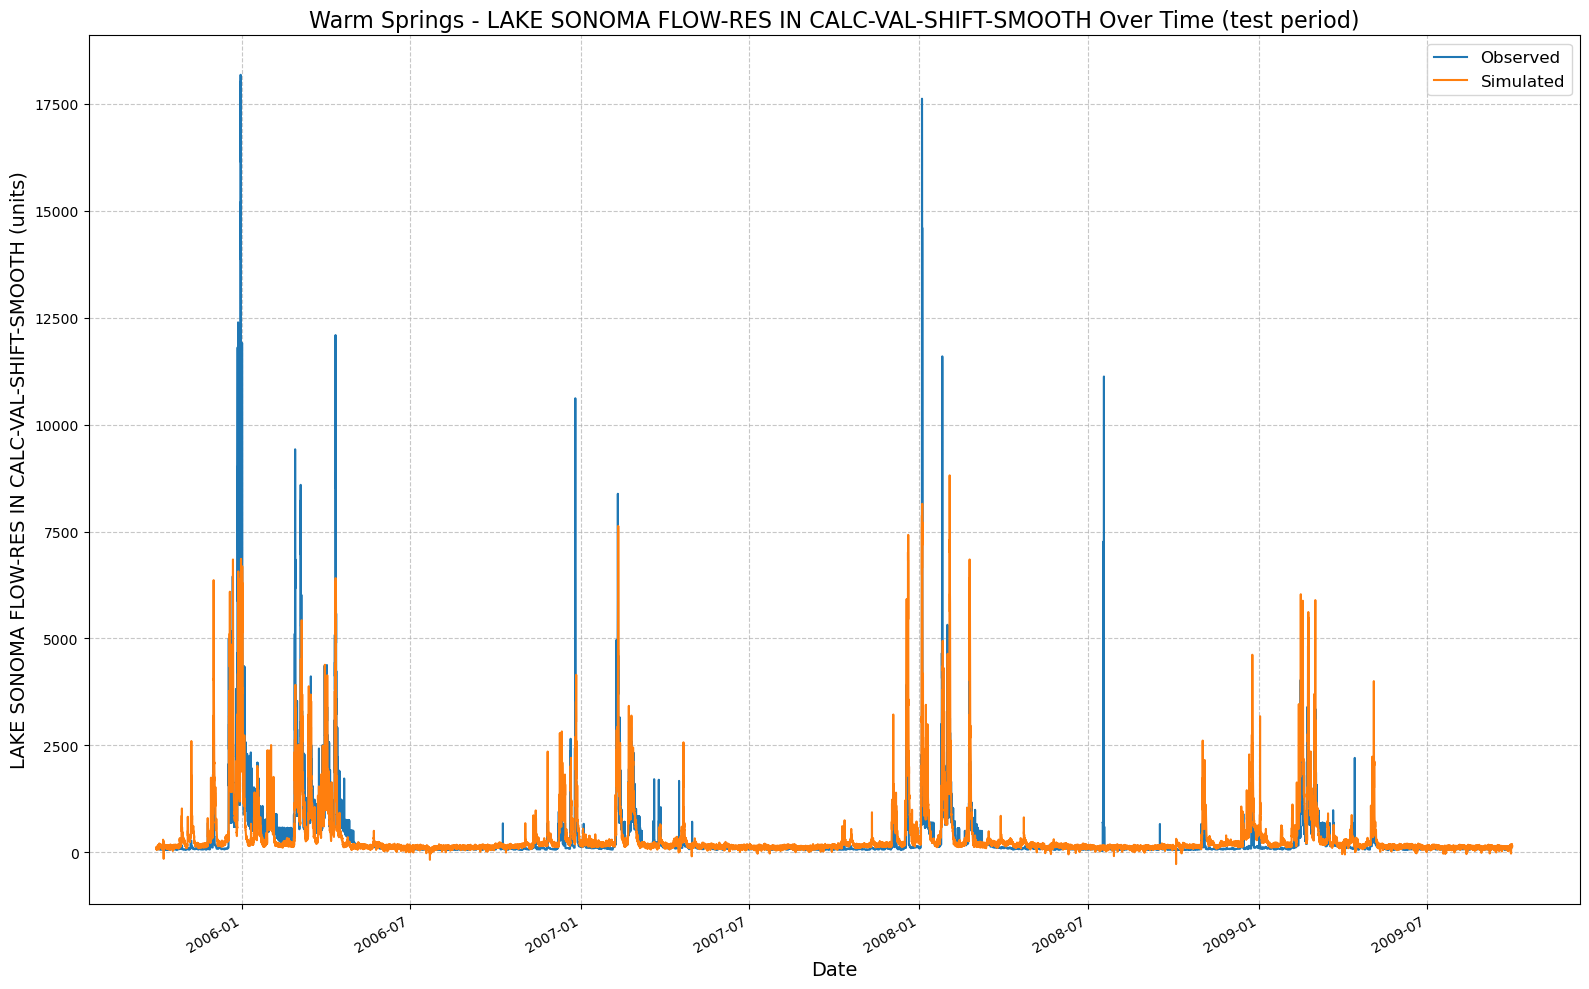

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_091840\results_output_test.csv


In [16]:
lstm_result_metrics, lstm_result_path = lstmNoPhysicsHourlyExtended.results('test')

In [17]:
lstm_result_metrics

{'NSE': 0.5206184387207031,
 'MSE': 322153.4375,
 'RMSE': 567.5856212942679,
 'KGE': 0.6208550683282275,
 'Alpha-NSE': 0.7937931520234823,
 'Beta-KGE': 1.163478136062622,
 'Beta-NSE': 0.05933808075703052,
 'Pearson-r': 0.7270448496740293,
 'FHV': -13.913607597351074,
 'FMS': -12.997874004165702,
 'FLV': -2293.593059542176,
 'Peak-Timing': nan,
 'Peak-MAPE': 55.82578705578316}

## Retrain PI-LSTM on entire train period using best hyperparameters, evaluate on test period

In [19]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/WarmSprings_Inflow_hourly.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
#extend train period set to true
lstmPhysicsHourlyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=True, extend_train_period=True)

In [20]:
lstmPhysicsHourlyExtended.train()

2025-01-29 09:29:31,314: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_092931\output.log initialized.
2025-01-29 09:29:31,317: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_092931
2025-01-29 09:29:31,318: ### Run configurations for testing_run
2025-01-29 09:29:31,320: experiment_name: testing_run
2025-01-29 09:29:31,322: train_basin_file: warm springs
2025-01-29 09:29:31,324: validation_basin_file: warm springs
2025-01-29 09:29:31,326: test_basin_file: warm springs
2025-01-29 09:29:31,328: train_start_date: 1994-10-01 00:00:00
2025-01-29 09:29:31,330: train_end_date: 2005-09-30 00:00:00
2025-01-29 09:29:31,332: validation_start_date: 2002-10-01 00:00:00
2025-01-29 09:29:31,334: validation_end_date: 2005-09-30 00:00:00
2025-01-29 09:29:31,335: test_start_date: 2005-10-01 00:00:00
2025-01-29 09:29:31,337: test_end_date: 2009-09-30 00:00:00
2025-01-29 09:29:31,338: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:07<00:00,  7.78s/it]
2025-01-29 09:40:40,066: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_092931\validation\model_epoch016\validation_metrics.csv
2025-01-29 09:40:40,076: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_092931\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_2901_092931')

2025-01-29 09:40:40,190: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_092931\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Evaluation: 100%|██████████| 1/1 [00:08<00:00,  8.51s/it]
2025-01-29 09:40:48,709: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_092931\test\model_epoch016\test_metrics.csv
2025-01-29 09:40:48,720: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_092931\test\model_epoch016\test_results.p
Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH
Observed_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_obs
Simulated_key: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

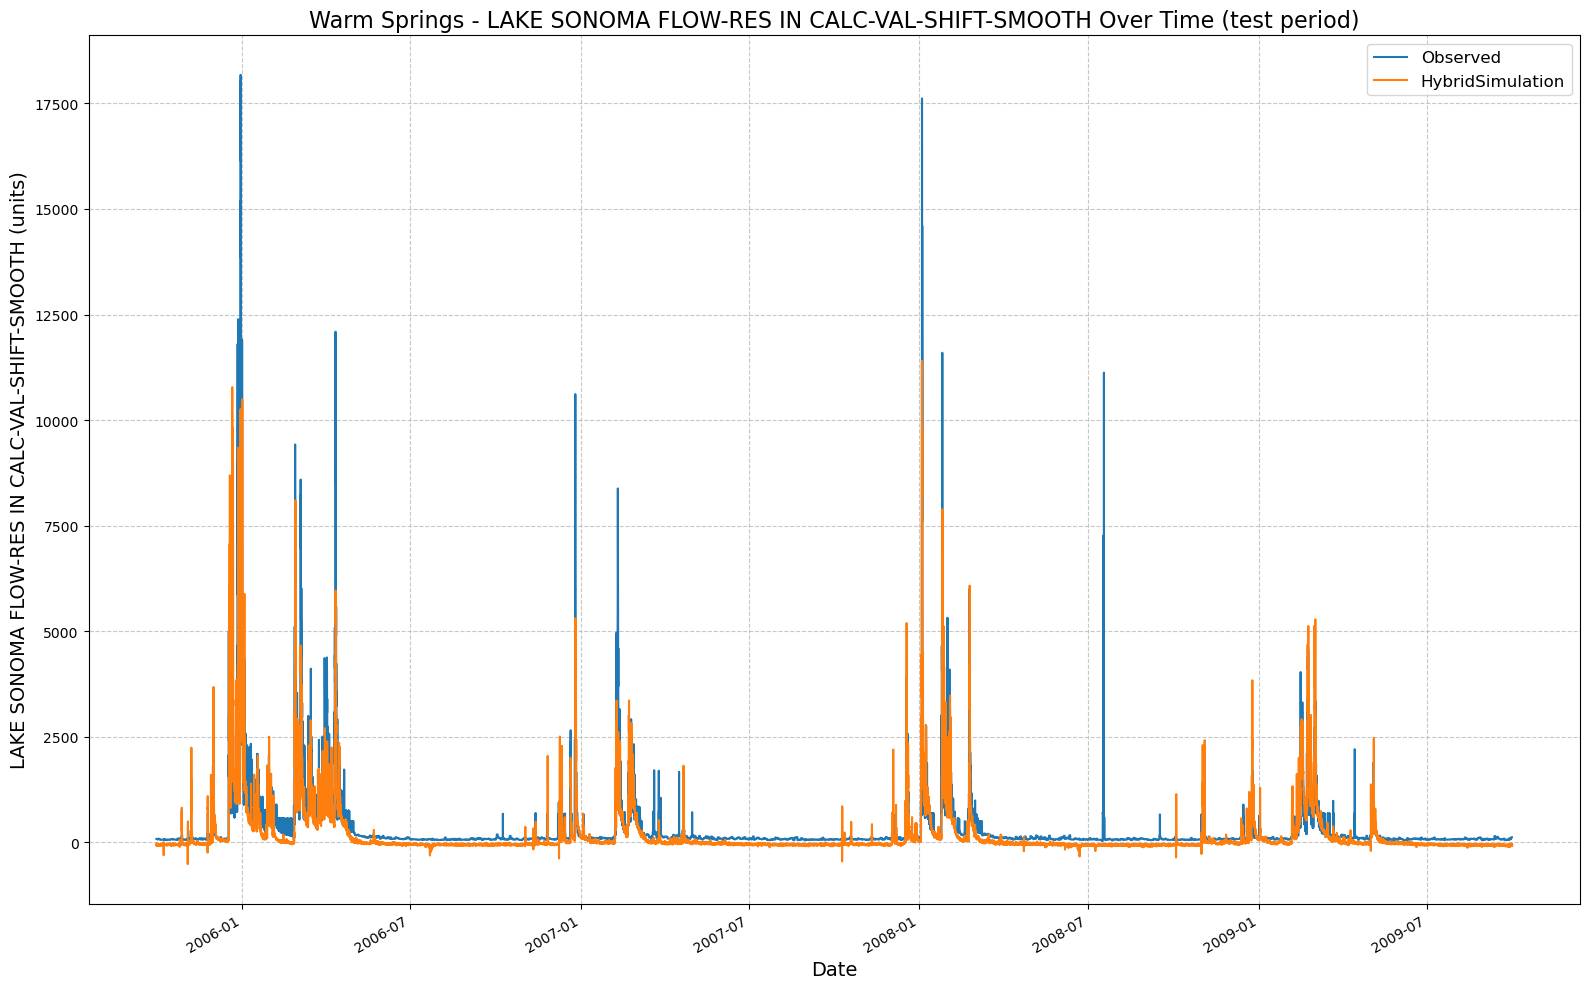

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_2901_092931\results_output_test.csv


In [21]:
physics_informed_result_metrics, physics_informed_result_path = lstmPhysicsHourlyExtended.results('test')

In [22]:
physics_informed_result_metrics

{'NSE': 0.6369035542011261,
 'MSE': 244007.625,
 'RMSE': 493.9712795294884,
 'KGE': 0.48437432258780566,
 'Alpha-NSE': 0.8177656711292767,
 'Beta-KGE': 0.5548460483551025,
 'Beta-NSE': -0.16157863179848655,
 'Pearson-r': 0.8142624218884243,
 'FHV': -17.82376319169998,
 'FMS': 1840.0767364314308,
 'FLV': 99.9999999875902,
 'Peak-Timing': nan,
 'Peak-MAPE': 64.42202591314549}

## Inspect results

In [24]:
    model1_df = pd.read_csv(lstm_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01 00:00:00,82.0,114.943910
1,2005-10-01 01:00:00,82.0,66.258880
2,2005-10-01 02:00:00,82.0,81.471954
3,2005-10-01 03:00:00,82.0,91.867065
4,2005-10-01 04:00:00,82.0,63.031464


In [25]:
    model2_df = pd.read_csv(physics_informed_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01 00:00:00,82.0,114.943910
1,2005-10-01 01:00:00,82.0,66.258880
2,2005-10-01 02:00:00,82.0,81.471954
3,2005-10-01 03:00:00,82.0,91.867065
4,2005-10-01 04:00:00,82.0,63.031464


In [52]:
#hms_df = clean_hourly(pd.read_csv(path_to_physics_data))
hms_df = pd.read_csv(path_to_physics_data)
hms_df.head()

C:\Users\Dino\AppData\Local\Temp\ipykernel_9112\1668555767.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  hms_df = pd.read_csv(path_to_physics_data)


,Col number,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Ordinate,Date,Time,Warm Springs Dam Inflow FLOW,Dry Creek 20 ET-POTENTIAL,Dry Creek 20 FLOW,Dry Creek 20 FLOW-BASE,Dry Creek 20 INFILTRATION,Dry Creek 20 PERC-SOIL,Dry Creek 20 SATURATION FRACTION,Dry Creek 30 ET-POTENTIAL,Dry Creek 30 FLOW,Dry Creek 30 FLOW-BASE,Dry Creek 30 INFILTRATION,Dry Creek 30 PERC-SOIL,Dry Creek 30 SATURATION FRACTION
1,Units,,NaN,CFS,IN,CFS,CFS,IN,IN,IN/IN,IN,CFS,CFS,IN,IN,IN/IN
2,Type,,NaN,INST-VAL,PER-CUM,INST-VAL,INST-VAL,PER-CUM,PER-CUM,INST-VAL,PER-CUM,INST-VAL,INST-VAL,PER-CUM,PER-CUM,INST-VAL
3,2,1-Oct-94,01:00:00,64.826,0,21.107,21.107,0,0,0,0,43.719,43.719,0,0,0
4,3,1-Oct-94,02:00:00,64.826,0,21.107,21.107,0,0,0,0,43.719,43.719,0,0,0


 ## Plot combined results

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\UCB_training\UCB_train.py:452: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  hms_df = clean_daily(pd.read_csv(HMS_results))


            date  Observed_Model1  Predicted_Model1  Observed_Model2  \
96432 2005-10-01             82.0         114.94391             82.0   
96433 2005-10-01             82.0         114.94391             82.0   
96434 2005-10-01             82.0         114.94391             82.0   
96435 2005-10-01             82.0         114.94391             82.0   
96436 2005-10-01             82.0         114.94391             82.0   

       Predicted_Model2  HMS_predicted  
96432               0.0         64.826  
96433               0.0         64.826  
96434               0.0         64.826  
96435               0.0         64.826  
96436               0.0         64.826  


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

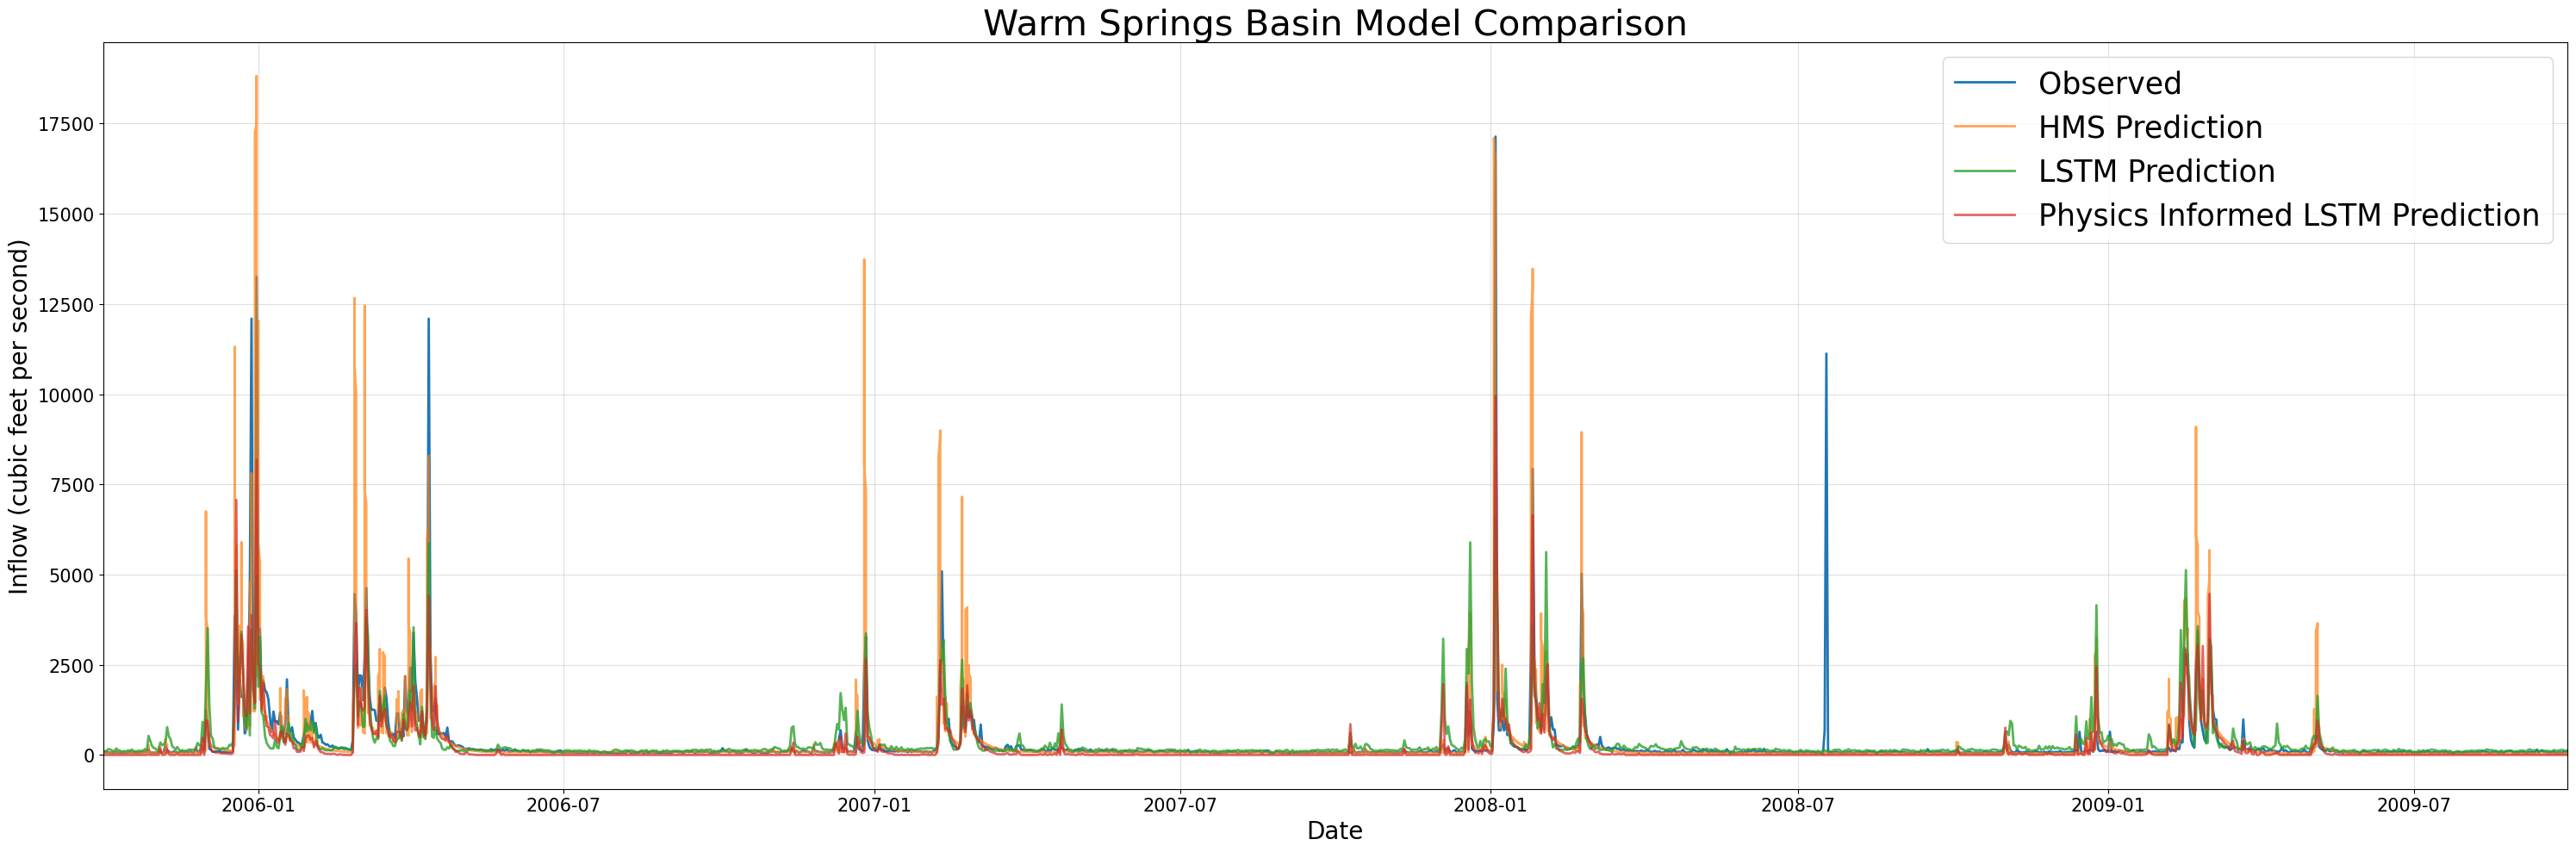

In [54]:
myplot, metrics_df = combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Warm Springs Basin Model Comparison', fName = "warm_springs_hourly_metrics.csv")

In [56]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,0.402440,0.491794,0.622405
MSE,544901.273979,463421.816311,344320.335451
RMSE,738.174284,680.750921,586.788152
KGE,0.705365,0.542851,0.459849
Alpha-NSE,1.016108,0.662019,0.673207
Beta-KGE,0.986989,1.080809,0.613788
Beta-NSE,-0.004263,0.026477,-0.126541
Pearson-r,0.706093,0.702974,0.810765
FHV,11.068771,-25.644019,-30.736005
FMS,30.849685,-9.447914,1839.690365
